In [1]:
import os

import earthpy as et
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# download data
et.data.get_data('spatial-vector-lidar')


# set working directory

working_dir = os.path.join(et.io.HOME, 'earth-analytics', 'data')
if not os.path.exists(working_dir):
    print('Working directory {} does not exist.'.format(working_dir))
    os.makedirs(working_dir)
    
os.chdir(working_dir)
print('Working directory changed to {}'.format(working_dir))

Working directory changed to /Users/robynmarowitz/earth-analytics/data


In [18]:
%%bash
find spatial-vector-lidar/california

spatial-vector-lidar/california
spatial-vector-lidar/california/madera-county-roads
spatial-vector-lidar/california/madera-county-roads/tl_2013_06039_roads.shx
spatial-vector-lidar/california/madera-county-roads/tl_2013_06039_roads.shp
spatial-vector-lidar/california/madera-county-roads/tl_2010_05143_roads.shp.xml
spatial-vector-lidar/california/madera-county-roads/tl_2013_06039_roads.dbf
spatial-vector-lidar/california/madera-county-roads/tl_2013_06039_roads.shp.xml
spatial-vector-lidar/california/madera-county-roads/metadata.html
spatial-vector-lidar/california/madera-county-roads/tl_2013_06039_roads.prj
spatial-vector-lidar/california/neon-sjer-site
spatial-vector-lidar/california/neon-sjer-site/2013
spatial-vector-lidar/california/neon-sjer-site/2013/insitu
spatial-vector-lidar/california/neon-sjer-site/2013/insitu/veg_metadata_desc_DataInstitute2016.csv
spatial-vector-lidar/california/neon-sjer-site/2013/insitu/veg_chemistry
spatial-vector-lidar/california/neon-sjer-site/2013/insi

In [38]:
# set CA data path
ca_path = os.path.join('spatial-vector-lidar', 'california')
sjer_vector_path = os.path.join(
    ca_path, 'neon-sjer-site', 'vector_data')

# set madera county roads path
madera_roads_path = os.path.join(
    ca_path, 'madera-county-roads', 'tl_2013_06039_roads.shp')

# set SJER site centroids path
sjer_sites_path = os.path.join(
    sjer_vector_path, 'SJER_plot_centroids.shp')

# set SJER area of interest path
sjer_aoi_path = os.path.join(sjer_vector_path,'SJER_crop.shp')

# set CA counties path
ca_counties_path = os.path.join(
    ca_path, 'CA_Counties', 'CA_Counties_TIGER2016.shp')

# set california roads path
ww_roads_path = os.path.join(
    'spatial-vector-lidar', 
    'global', 'ne_10m_roads', 'ne_10m_roads.shp') 

path_list = [
    madera_roads_path, sjer_sites_path, 
    sjer_aoi_path, ca_counties_path, ww_roads_path]

for pth in path_list:
    if os.path.exists(pth):
        print('{} exists'.format(pth))
    else:
        print('{} does not exist'.format(pth))

spatial-vector-lidar/california/madera-county-roads/tl_2013_06039_roads.shp exists
spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_plot_centroids.shp exists
spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_crop.shp exists
spatial-vector-lidar/california/CA_Counties/CA_Counties_TIGER2016.shp exists
spatial-vector-lidar/global/ne_10m_roads/ne_10m_roads.shp exists


In [39]:
madera_roads_full_gdf = gpd.read_file(madera_roads_path)
madera_roads_full_gdf.RTTYP.unique()

# locate NA rows
na_rows = ~madera_roads_full_gdf.RTTYP.isin(['M', 'S', 'C'])
madera_roads_full_gdf.loc[na_rows, 'RTTYP'] = 'Unknown'
madera_roads_full_gdf.RTTYP.unique()

array(['M', 'Unknown', 'S', 'C'], dtype=object)

In [6]:
sjer_sites_full_gdf = gpd.read_file(sjer_sites_path)


In [7]:
sjer_aoi_gdf = gpd.read_file(sjer_aoi_path)


In [8]:
# set CRS's to match
madera_roads_full_gdf = madera_roads_full_gdf.to_crs(sjer_sites_full_gdf.crs)

if all([gdf.crs==sjer_aoi_gdf.crs 
        for gdf 
        in [madera_roads_full_gdf, 
            sjer_sites_full_gdf, 
            sjer_aoi_gdf]]):
    print('All CRSs match!')

All CRSs match!


<AxesSubplot:>

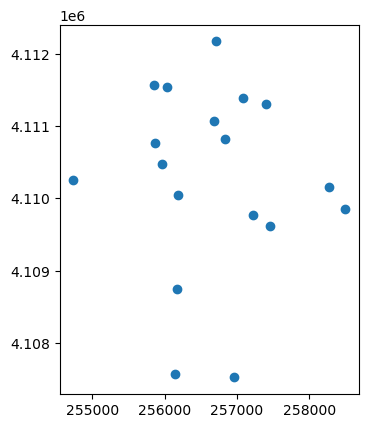

In [9]:
sjer_sites_full_gdf.plot()

<AxesSubplot:>

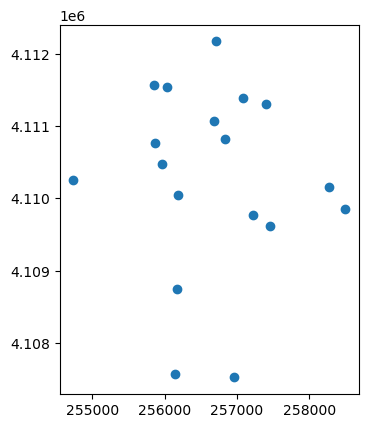

In [10]:
sjer_sites_gdf = sjer_sites_full_gdf.clip(sjer_aoi_gdf)
sjer_sites_gdf.plot()

<AxesSubplot:>

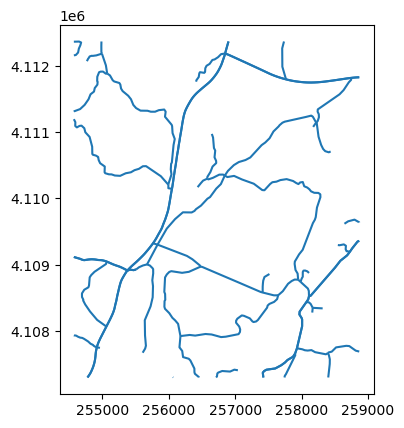

In [11]:
madera_roads_gdf = madera_roads_full_gdf.clip(sjer_aoi_gdf)
madera_roads_gdf.plot()

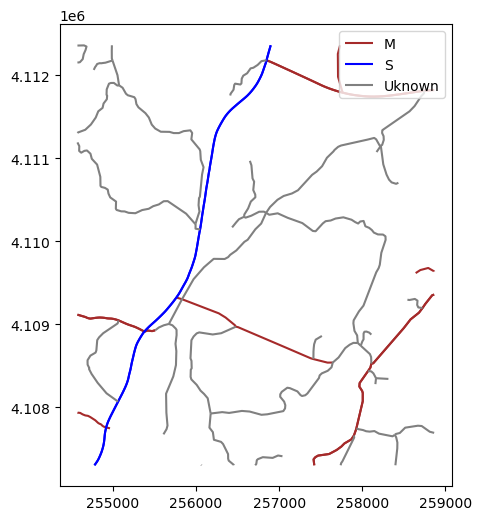

In [17]:
# create plot 
fig, ax = plt.subplots(1, 1, figsize=(6,6))

# add layers to plot
road_color_dict = {
    'M': 'brown',
    'S': 'blue', 
    'Unknown': 'grey'
}
road_type_dict = {
    'M':'M',
    'S': 'S',
    'Unknown': 'Uknown'
}
for rttyp, gdf in madera_roads_gdf.groupby('RTTYP'):
    gdf.plot(ax=ax,
             color=road_color_dict[rttyp], label=road_type_dict[rttyp])
ax.legend()
    

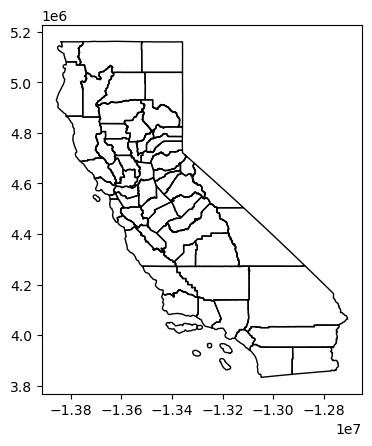

In [30]:
ca_counties_gdf = gpd.read_file(ca_counties_path)
ca_counties_gdf.plot(facecolor='none')
plt.show()

<AxesSubplot:>

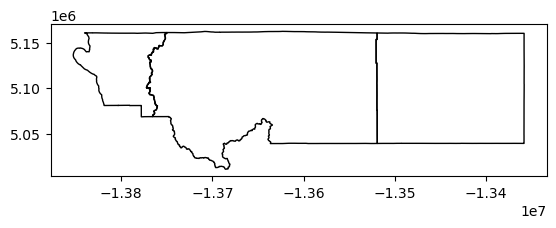

In [34]:
three_counties_gdf = (
    ca_counties_gdf[
    ca_counties_gdf.NAME.isin(['Del Norte','Modoc', 'Siskiyou'])])

three_counties_gdf.plot(facecolor='none')

In [41]:
ww_roads_gdf = gpd.read_file(ww_roads_path)

In [45]:
three_counties_reproj_gdf = three_counties_gdf.to_crs(ww_roads_gdf.crs)
three_counties_reproj_gdf.sjoin(
    ww_roads_gdf, how='inner', predicate='intersects')

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,add,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label
34,06,015,01682074,06015,Del Norte,Del Norte County,06,H1,G4020,None,...,0,0,0,None,66205,North America,0,Other,7.1,9.6
34,06,015,01682074,06015,Del Norte,Del Norte County,06,H1,G4020,None,...,0,0,0,None,66205,North America,0,Federal,4.0,7.0
34,06,015,01682074,06015,Del Norte,Del Norte County,06,H1,G4020,None,...,0,0,0,None,56005,North America,0,Federal,4.0,7.0
34,06,015,01682074,06015,Del Norte,Del Norte County,06,H1,G4020,None,...,0,0,0,None,54205,North America,0,Federal,4.0,7.0
34,06,015,01682074,06015,Del Norte,Del Norte County,06,H1,G4020,None,...,0,0,0,None,52805,North America,0,Federal,6.0,7.9
35,06,049,00277289,06049,Modoc,Modoc County,06,H1,G4020,None,...,0,0,0,None,100105,North America,0,Federal,6.0,7.9
35,06,049,00277289,06049,Modoc,Modoc County,06,H1,G4020,None,...,0,0,0,None,79205,North America,0,State,7.0,8.6
35,06,049,00277289,06049,Modoc,Modoc County,06,H1,G4020,None,...,0,0,266,None,3332,North America,0,Other,7.0,8.6
35,06,049,00277289,06049,Modoc,Modoc County,06,H1,G4020,None,...,0,0,276,None,5406,North America,0,State,7.0,8.6
35,06,049,00277289,06049,Modoc,Modoc County,06,H1,G4020,None,...,0,0,0,None,74305,North America,0,Federal,6.0,7.9


<AxesSubplot:>

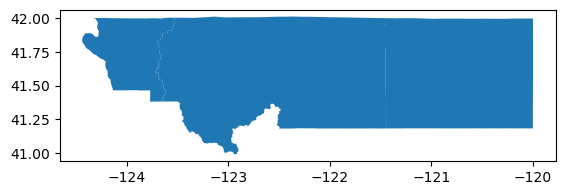

In [46]:
three_counties_reproj_gdf.plot()